In [1]:
import pandas as pd
from dataDownloader import DataDownloader
from db_financialStatement import DB_FinancialStatement
from db_stock import DB_Stock
from db_nyse import DB_NYSE
from commonHelper import EDateType
from datetime import datetime
import yfinance as yf
from portfolio import Portfolio

pd.set_option('display.max_rows', None)  # 모든 행 출
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.expand_frame_repr', False)  # 긴 데이터 프레임 줄바꿈 없이 출력


In [3]:
from yFinanceInfo import YFinanceInfo

symbols = []
db=DB_NYSE()
db.connect()

symbols = db.getSymbolList()

db.disconnect()

db = DB_Stock()
db.connect()

freq = EDateType.MONTHLY
# df = db.getPerformanceSummary(['MRNA'], '2015-12-01', '2025-02-28', freq=freq)
# df = db.getPerformanceSummary(['AMD'], '2025-01-01', freq= freq)
df = db.get_performance(['AMD', 'MRNA'], '2025-01-01')
display(df)

db.disconnect()

AMD 애러발생 : 'Symbol'
fail_symbol : []


ValueError: No objects to concatenate

In [ ]:
DataDownloader.downloadStockDataAndSaveDB(start='2025-01-01', symbols=symbols, startIndex=4000, endIndex=5000)

[*                      3%                       ]  3 of 100 completed

총 1000개의 심볼을 100개씩 나눠서 10번에 걸쳐 처리합니다. (심볼 인덱스 범위: 4000 ~ 5000)
[1/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


3460 rows inserted/updated successfully.
[1/10] 데이터 저장 완료.
5초 대기 중...


[**                     5%                       ]  5 of 100 completed

[2/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


3307 rows inserted/updated successfully.
[2/10] 데이터 저장 완료.
5초 대기 중...


[*                      2%                       ]  2 of 100 completed

[3/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


3450 rows inserted/updated successfully.
[3/10] 데이터 저장 완료.
5초 대기 중...


[**                     4%                       ]  4 of 100 completed

[4/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


3055 rows inserted/updated successfully.
[4/10] 데이터 저장 완료.
5초 대기 중...


[**                     4%                       ]  4 of 100 completed

[5/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


2458 rows inserted/updated successfully.
[5/10] 데이터 저장 완료.
5초 대기 중...


[*                      3%                       ]  3 of 100 completed

[6/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed

1 Failed download:
['USGOW']: YFInvalidPeriodError("USGOW: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


4023 rows inserted/updated successfully.
[6/10] 데이터 저장 완료.
5초 대기 중...
[7/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


3824 rows inserted/updated successfully.
[7/10] 데이터 저장 완료.
5초 대기 중...


[**                     5%                       ]  5 of 100 completed

[8/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


3986 rows inserted/updated successfully.
[8/10] 데이터 저장 완료.
5초 대기 중...


[***                    6%                       ]  6 of 100 completed

[9/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


2865 rows inserted/updated successfully.
[9/10] 데이터 저장 완료.
5초 대기 중...


[***                    7%                       ]  7 of 100 completed

[10/10] 100개 심볼 다운로드 중...


[*********************100%***********************]  100 of 100 completed


4442 rows inserted/updated successfully.
[10/10] 데이터 저장 완료.
모든 데이터 처리 완료.


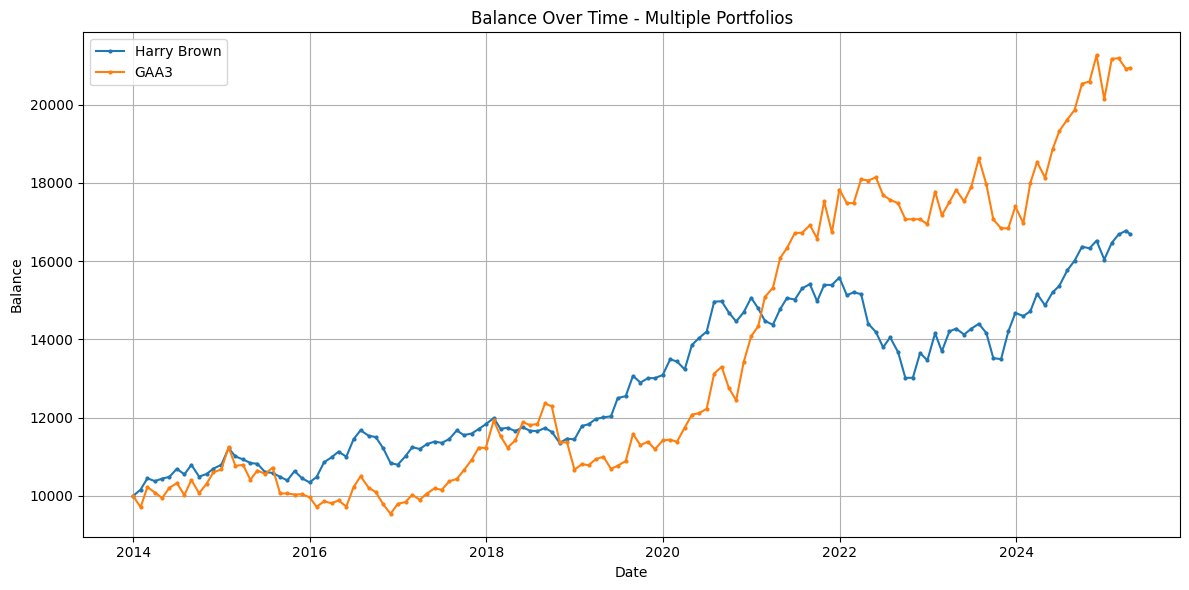

,Name,Symbol,Start Date,End Date,Start Balance,End Balance,Annualized Return (CAGR),Standard Deviation,Sharpe Ratio,Maximum Drawdown
0,Harry Brown,"[VTI, TLT, BIL, GLD]",2013-12-31,2025-04-17,10000,16689,0.046228,0.071865,0.387247,-0.164677


,Name,Symbol,Start Date,End Date,Start Balance,End Balance,Annualized Return (CAGR),Standard Deviation,Sharpe Ratio,Maximum Drawdown
0,GAA3,"[SPY, IWM, MTUM, EFA, TLT, IEF, LQD, DBC, VNQ,...",2013-12-31,2025-04-17,10000,20940.0,0.067386,0.10234,0.494073,-0.151267


In [ ]:
Portfolio.show_portfolio()